In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

from utils import plot3Dcube

A_MIN = 1071 # minimum material value (shear wave velocity in m/s)
A_MAX = 4500 # maximum material value (shear wave velocity in m/s)

%matplotlib widget

# Materials

Read 2000 materials

In [3]:
a = np.load('./data/materials0-1999.npy')
print(a.shape)

(2000, 32, 32, 32)


In [11]:
I1min = 2000
I1max = 2000
I2min = 0
I2max = 2000
n = 2000
N = 100

for I1 in range(I1min, I1max+1, n):
    for I2 in range(max(I1, I2min), I2max+1, n):
        print(I1, I2, N)

2000 2000 100


/tmp/ipykernel_14759/2966602900.py:75: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(m, shrink=0.7, pad=0.1, label=vlabel)


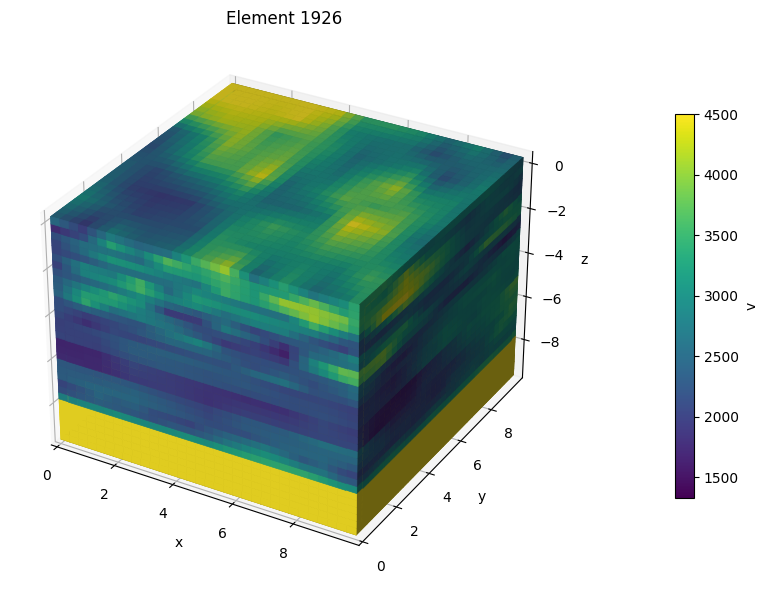

In [10]:
element = 1926

plot3Dcube(a[element], Xvec = np.linspace(0, 9600, 32), Yvec = np.linspace(0, 9600, 32), 
           Zvec = np.linspace(-9600, 0, 32), 
           figsize=(5.5,4), title=f'Element {element}')

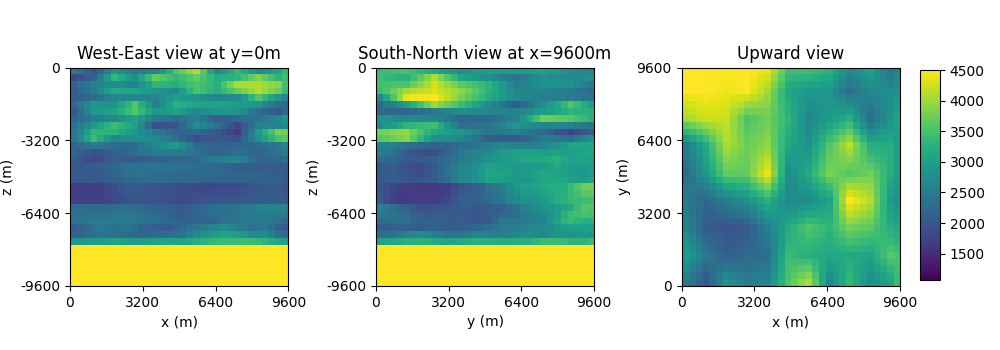

In [35]:
element = 1926

ticks = np.linspace(-0.5, 31.5, 4) # rename intrinsic ticks between 0 and 32 to real meter values
ticklabels = np.linspace(0, 9600, 4).astype(int)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3.5))
# West-East view at y=0m
im = ax1.imshow(a[element, :, 0, :].T, vmin=A_MIN, vmax=A_MAX, origin='lower')
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticklabels)
ax1.set_xlabel('x (m)')
ax1.set_yticks(ticks)
ax1.set_yticklabels(ticklabels-9600)
ax1.set_ylabel('z (m)')
ax1.set_title('West-East view at y=0m')

# South-North view at x=9600m
ax2.imshow(a[element, -1, :, :].T, vmin=A_MIN, vmax=A_MAX, origin='lower')
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticklabels)
ax2.set_xlabel('y (m)')
ax2.set_yticks(ticks)
ax2.set_yticklabels(ticklabels-9600)
ax2.set_ylabel('z (m)')
ax2.set_title('South-North view at x=9600m')

# upward view
ax3.imshow(a[element, :, :, -1].T, vmin=A_MIN, vmax=A_MAX, origin='lower')
ax3.set_xticks(ticks)
ax3.set_xticklabels(ticklabels)
ax3.set_xlabel('x (m)')
ax3.set_yticks(ticks)
ax3.set_yticklabels(ticklabels)
ax3.set_ylabel('y (m)')
ax3.set_title('Upward view')

fig.subplots_adjust(wspace=0.4, left=0.07, right=0.9)
cax = plt.axes([0.92, 0.2, 0.02, 0.6])
fig.colorbar(im, cax=cax)
plt.show()

# Velocity fields

Read a batch of 100 velocity fields

In [2]:
v = pd.read_feather('./data/velocity0-99.feather')
v.columns = list(v.columns[:5]) + list(v.columns[5:].astype(float))
v.head()

,run,field,x,y,z,0.0,0.01,0.02,0.03,0.04,...,19.9,19.91,19.92,19.93,19.94,19.95,19.96,19.97,19.98,19.99
0,0.0,Veloc E,150.0,150.0,-1.0,0.0,0.0,-1.210077e-131,-1.030836e-117,-7.841573e-109,...,0.000017,-0.000003,-0.000018,-0.000024,-0.000019,-0.000008,0.000003,0.000010,0.000011,0.000010
1,0.0,Veloc N,150.0,150.0,-1.0,0.0,0.0,-1.192823e-131,-1.014978e-117,-7.768531e-109,...,-0.000075,-0.000068,-0.000064,-0.000063,-0.000062,-0.000057,-0.000045,-0.000030,-0.000017,-0.000012
2,0.0,Veloc Z,150.0,150.0,-1.0,0.0,0.0,1.591778e-131,1.450313e-117,1.113751e-108,...,0.000291,0.000286,0.000282,0.000279,0.000280,0.000284,0.000291,0.000300,0.000307,0.000310
3,0.0,Veloc E,770.0,150.0,-1.0,0.0,0.0,8.219082e-126,5.107956e-113,1.067340e-104,...,0.000031,0.000022,0.000009,-0.000006,-0.000020,-0.000031,-0.000038,-0.000044,-0.000047,-0.000048
4,0.0,Veloc N,770.0,150.0,-1.0,0.0,0.0,1.028426e-125,6.193154e-113,1.258373e-104,...,-0.000055,-0.000049,-0.000040,-0.000029,-0.000017,-0.000006,0.000001,0.000006,0.000009,0.000010


List the sensors' coordinates

In [38]:
print(np.unique(v.x))
print(np.unique(v.y))

[ 150.  770. 1390. 2010. 2630. 3250. 3870. 4490. 5110. 5730. 6350. 6970.
 7590. 8210. 8830. 9450.]
[ 150.  770. 1390. 2010. 2630. 3250. 3870. 4490. 5110. 5730. 6350. 6970.
 7590. 8210. 8830. 9450.]


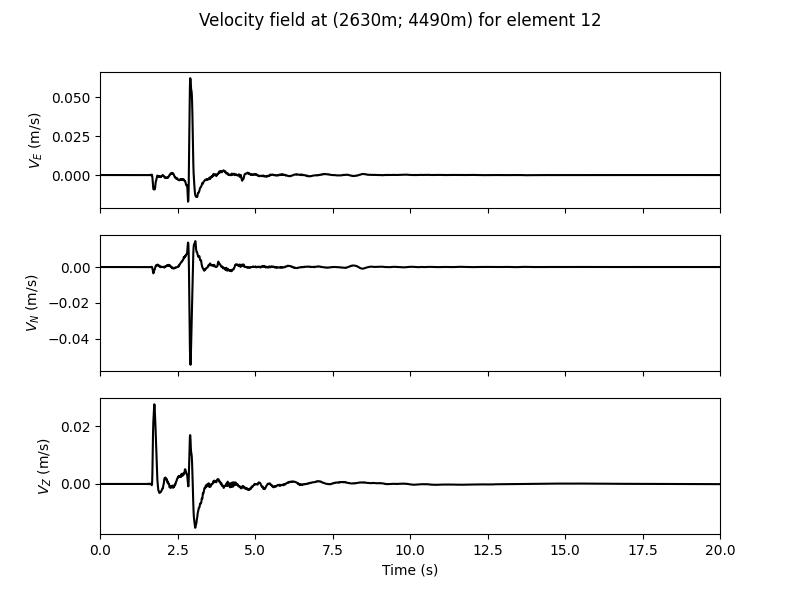

In [48]:
element = 12 # simulation index
sensor_x, sensor_y = 2630, 4490 # sensor coordinates
v_element = v.loc[(v.run==element)&(v.x==sensor_x)&(v.y==sensor_y)]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8,6))
ax1.plot(v_element.loc[v_element.field=='Veloc E'].iloc[:,5:].T, 'k')
ax1.set_ylabel('$V_E$ (m/s)')

ax2.plot(v_element.loc[v_element.field=='Veloc N'].iloc[:,5:].T, 'k')
ax2.set_ylabel('$V_N$ (m/s)')

ax3.plot(v_element.loc[v_element.field=='Veloc Z'].iloc[:,5:].T, 'k')
ax3.set_ylabel('$V_Z$ (m/s)')
ax3.set_xlim([0, 20])
ax3.set_xlabel('Time (s)')
fig.suptitle(f'Velocity field at ({int(sensor_x)}m; {int(sensor_y)}m) for element {element}')

plt.show()